In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [29]:
original_df=pd.read_csv('ai4i2020.csv')
print(f"shape of data {original_df.shape}")
original_df.info()

shape of data (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dt

In [30]:
original_df.describe().T


,count,mean,std,min,25%,50%,75%,max
UDI,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.30,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.80,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.00,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.20,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.00,108.0,162.00,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.00,0.0,0.00,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.00,0.0,0.00,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.00,0.0,0.00,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.00,0.0,0.00,1.0


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
drop_columns = ['UDI','TWF','HDF','PWF','OSF','RNF', 'Product ID']
df = original_df.drop(drop_columns, axis=1)
df['Type'] = le.fit_transform(df['Type'])
print(df.head())
X = df.loc[:, df.columns!='Machine failure']
y = df.loc[:, df.columns=='Machine failure']

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     1                298.2                    308.7                    1408   
2     1                298.1                    308.5                    1498   
3     1                298.2                    308.6                    1433   
4     1                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  
0         42.8                0                0  
1         46.3                3                0  
2         49.4                5                0  
3         39.5                7                0  
4         40.0                9                0  


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

/opt/anaconda3/envs/ml/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2962962962962963
0.9725


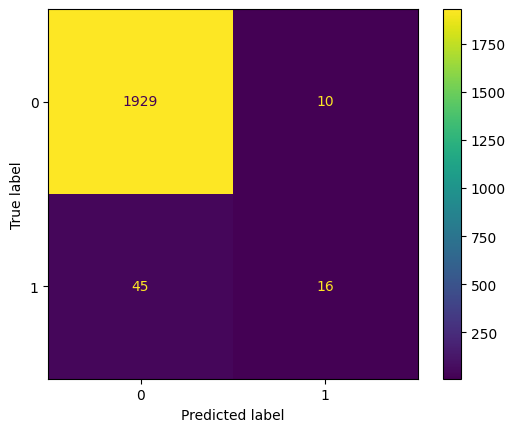

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
print(fbeta_score(y_test, y_pred, beta=2.0))
print(lr.score(x_test, y_test))
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.show()


Let's balance our data

# Multi-label problem

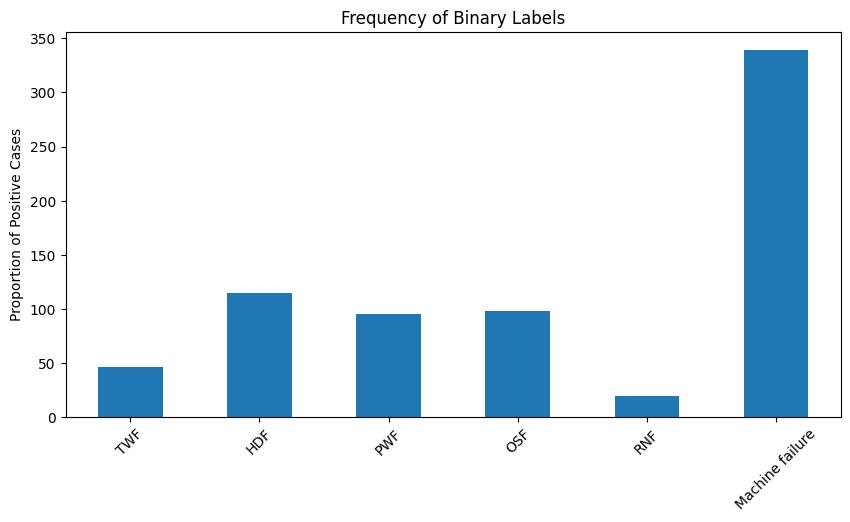

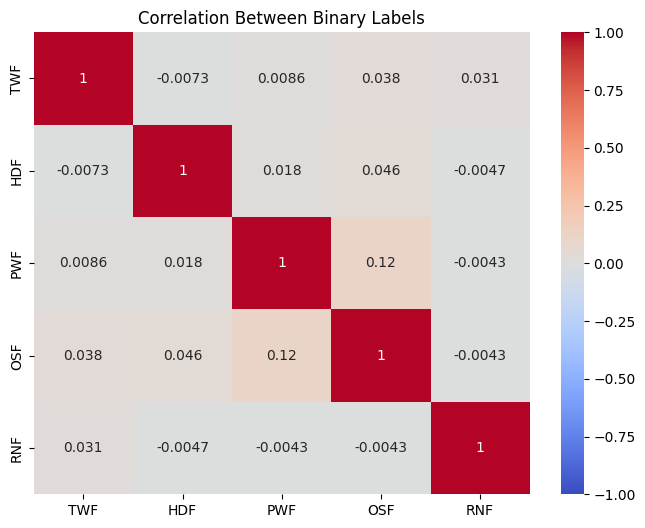

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

original_df=pd.read_csv('ai4i2020.csv')

labels = original_df[ ['TWF','HDF','PWF','OSF','RNF', 'Machine failure'] ]
freq =labels.sum()
labels = original_df[ ['TWF','HDF','PWF','OSF','RNF'] ]

label_descriptions = {
    'TWF': 'Tool Wear Failure',
    'HDF': 'Heat Dissipation Failure',
    'PWF': 'Power Failure',
    'OSF': 'Overstrain Failure',
    'RNF': 'Random Failure'
}
# Plot
plt.figure(figsize=(10, 5))
freq.plot(kind='bar')
plt.title('Frequency of Binary Labels')
plt.ylabel('Proportion of Positive Cases')
plt.xticks(rotation=45)
plt.show()

import seaborn as sns

# Calculate correlation
corr = labels.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Binary Labels')
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
drop_columns = ['UDI', 'Machine failure', 'Product ID']
df = original_df.drop(drop_columns, axis=1)
df['Type'] = le.fit_transform(df['Type'])
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0
9996,0,298.9,308.4,1632,31.8,17,0,0,0,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0
9998,0,299.0,308.7,1408,48.5,25,0,0,0,0,0
